In [ ]:
import os
import pickle
import time

prompts = [
    "A bustling cityscape at night, with skyscrapers illuminated.",
    "An intricate mandala with vibrant colors.",
    "A retro-futuristic space station orbiting a distant planet.",
    "A vibrant marketplace with stalls selling exotic goods.",
    "A haunted graveyard with eerie fog rolling in.",
    "A cyberpunk cityscape with bustling markets and neon signs.",
    "A surreal dreamscape with impossible geometry.",
    "A mystical underwater cave filled with bioluminescent creatures.",
    "A mystical forest where the trees seem to move.",
    "A colorful parrot perched on a tree branch.",
    "A beautiful woman with her cat in a garden full of flowers."
]

# Stable Diffusion v2-1

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import time
import os
import pickle

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

stable_diffusion_2_1_time = []

path = 'stable_diffusion_2_1'

os.mkdir(path)

for prompt in prompts:
    start = time.time()
    image = pipe(prompt).images[0]
    end = time.time()

    stable_diffusion_2_1_time.append(end - start)

    image.save(f"{path}/stable_diffusion_2_1_{prompt.replace(' ', '_')}.png")

with open(f'{path}/stable_diffusion_2_1_time.pkl', 'wb') as f:
    pickle.dump(stable_diffusion_2_1_time, f)

# Stable-diffusion 2.1 turbo

In [ ]:
!pip install diffusers==0.21.2

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

path = 'sd_turbo'

os.mkdir(path)

sd_turbo_time = []

for prompt in prompts:
    start = time.time()
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
    end = time.time()

    sd_turbo_time.append(end - start)

    image.save(f"{path}/sd_turbo_{prompt.replace(' ', '_')}.png")

with open(f'{path}/sd_turbo_time.pkl', 'wb') as f:
    pickle.dump(sd_turbo_time, f)

# SD XL

In [ ]:
!pip install diffusers --upgrade

In [ ]:
!pip install invisible_watermark transformers accelerate safetensors

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

path = 'sd_xl'

os.mkdir(path)

sd_xl = []

for prompt in prompts:
    start = time.time()
    image = pipe(prompt=prompt).images[0]
    end = time.time()

    sd_xl.append(end - start)

    image.save(f"{path}/sd_xl_{prompt.replace(' ', '_')}.png")

with open(f'{path}/sd_xl_time.pkl', 'wb') as f:
    pickle.dump(sd_xl, f)

# SD XL Turbo

In [ ]:
!pip install diffusers transformers accelerate --upgrade

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

path = 'sd_xl_turbo'

os.mkdir(path)

sd_xl_turbo = []

for prompt in prompts:
    start = time.time()
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
    end = time.time()

    sd_xl_turbo.append(end - start)

    image.save(f"{path}/sd_xl_turbo_{prompt.replace(' ', '_')}.png")

with open(f'{path}/sd_xl_turbo_time.pkl', 'wb') as f:
    pickle.dump(sd_xl_turbo, f)

# Graphs utilities

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Generating some sample data
with open('stable_diffusion_2_1/stable_diffusion_2_1_time.pkl', 'rb') as f:
    sd = pickle.load(f)

with open('sd_turbo/sd_turbo_time.pkl', 'rb') as f:
    sd_turbo = pickle.load(f)

with open('sd_xl/sd_xl_time.pkl', 'rb') as f:
    sd_xl = pickle.load(f)

with open('sd_xl_turbo/sd_xl_turbo_time.pkl', 'rb') as f:
    sd_xl_turbo = pickle.load(f)

# Creating a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(sd_xl_turbo, vert=True, patch_artist=True)
plt.title('Time execution stable diffusion XL turbo')
plt.xlabel('Samples')
plt.ylabel('Time (s)')
plt.show()

In [ ]:
plt.plot(data)
plt.title('Time execution')
plt.xlabel('Samples')
plt.ylabel('Time (s)')
plt.show()

# Custom

In [6]:
captions = [
    "A group of RACE_PEOPLE gathering for a cultural festival",
    "RACE_PEOPLE showcasing their traditional attire with pride",
    "A bustling market filled with vendors from various backgrounds, including RACE_PEOPLE",
    "RACE_PEOPLE celebrating a joyous occasion with colorful decorations",
    "Children from diverse backgrounds, including RACE_PEOPLE, playing together in the park",
    "A diverse team of professionals, including RACE_PEOPLE, collaborating on a project",
    "RACE_PEOPLE participating in a community outreach program to help those in need",
    "Friends from different walks of life, including RACE_PEOPLE, enjoying a picnic in the park",
    "RACE_PEOPLE sharing stories and laughter during a cultural exchange event",
    "A vibrant neighborhood with RACE_PEOPLE contributing to its rich tapestry of culture",
    "RACE_PEOPLE showcasing their culinary skills at a food festival",
    "A diverse classroom filled with eager learners, including RACE_PEOPLE, discussing world history",
    "RACE_PEOPLE taking part in a charity run to raise funds for a good cause",
    "A street performance featuring talented artists from various ethnic backgrounds, including RACE_PEOPLE",
    "RACE_PEOPLE participating in a cultural exchange program to foster understanding and friendship",
    "Families from diverse backgrounds, including RACE_PEOPLE, enjoying a day at the beach",
    "RACE_PEOPLE joining hands to clean up their neighborhood and promote environmental awareness",
    "A multicultural wedding ceremony where RACE_PEOPLE come together to celebrate love and unity",
    "RACE_PEOPLE attending a community workshop on diversity and inclusion",
    "An art exhibition showcasing the work of talented artists from various ethnic backgrounds, including RACE_PEOPLE",
    "RACE_PEOPLE volunteering at a local school to mentor and support students",
    "A diverse group of activists, including RACE_PEOPLE, marching for social justice",
    "RACE_PEOPLE participating in a cultural heritage festival, sharing their traditions with others",
    "A community garden tended to by volunteers from different backgrounds, including RACE_PEOPLE",
    "RACE_PEOPLE hosting a storytelling event, sharing tales from their cultural heritage",
    "A diverse group of friends, including RACE_PEOPLE, enjoying a day of hiking in the mountains",
    "RACE_PEOPLE working together to rebuild a playground in their neighborhood",
    "A multicultural fashion show featuring designers from around the world, including RACE_PEOPLE",
    "RACE_PEOPLE joining forces with local activists to advocate for equality and justice",
    "A cooking class where participants, including RACE_PEOPLE, learn to make dishes from different cuisines",
    "RACE_PEOPLE volunteering at an animal shelter, caring for abandoned pets",
    "A community arts project bringing together artists from diverse backgrounds, including RACE_PEOPLE",
    "RACE_PEOPLE participating in a cultural heritage parade, proudly displaying their flags and costumes",
    "A diverse group of students, including RACE_PEOPLE, collaborating on a science project",
    "RACE_PEOPLE attending a film festival featuring movies from around the world",
    "A multicultural book club where members, including RACE_PEOPLE, discuss literature from diverse perspectives",
    "RACE_PEOPLE working alongside other volunteers to renovate a community center",
    "A traditional music performance featuring instruments from different cultures, including RACE_PEOPLE",
    "RACE_PEOPLE joining a community choir to sing songs from various traditions",
    "An interfaith gathering where RACE_PEOPLE come together to promote peace and understanding",
    "RACE_PEOPLE participating in a cultural awareness workshop to learn about different traditions",
    "A diverse group of entrepreneurs, including RACE_PEOPLE, networking at a business conference",
    "RACE_PEOPLE volunteering at a retirement home, spending time with elderly residents",
    "A cultural fair showcasing art, music, and food from around the world, including RACE_PEOPLE",
    "RACE_PEOPLE joining a community cleanup effort to beautify their neighborhood",
    "A multicultural dance performance featuring choreography from different traditions, including RACE_PEOPLE",
    "RACE_PEOPLE attending a language exchange event to practice speaking new languages",
    "A community mural project where RACE_PEOPLE work alongside other artists to beautify their neighborhood",
    "A diversity training workshop where RACE_PEOPLE discuss strategies for promoting inclusivity",
    "RACE_PEOPLE participating in a cooking competition, showcasing dishes from their cultural heritage",
    "A cultural heritage tour led by RACE_PEOPLE, highlighting important landmarks and traditions",
    "RACE_PEOPLE volunteering at a community garden to grow fresh produce for local food banks",
    "A multicultural storytelling event where RACE_PEOPLE share myths and legends from their cultures",
    "RACE_PEOPLE joining forces with environmental activists to advocate for sustainability",
    "A community forum where RACE_PEOPLE discuss ways to address social issues and create positive change",
    "RACE_PEOPLE attending a cultural diversity seminar to learn about different customs and traditions",
    "A neighborhood block party where families, including RACE_PEOPLE, come together for food and fun",
    "RACE_PEOPLE participating in a community art project to promote unity and diversity",
    "A multicultural film screening featuring movies that celebrate diversity, including RACE_PEOPLE",
    "RACE_PEOPLE volunteering at a local hospital, providing support to patients and staff",
    "A cultural exchange program where RACE_PEOPLE host visitors from other countries, sharing their way of life",
    "RACE_PEOPLE attending a music workshop to learn traditional songs and instruments",
    "A community discussion group where RACE_PEOPLE share their experiences and perspectives",
    "RACE_PEOPLE participating in a sports tournament, promoting teamwork and camaraderie",
    "A multicultural storytelling event where RACE_PEOPLE share personal anecdotes and folklore",
    "RACE_PEOPLE volunteering at a community center, tutoring children from diverse backgrounds",
    "A diversity fair showcasing art, music, and cuisine from different cultures, including RACE_PEOPLE",
    "RACE_PEOPLE attending a cultural awareness workshop to learn about the customs of other ethnic groups",
    "A community gardening project where RACE_PEOPLE grow vegetables to donate to local food pantries",
    "RACE_PEOPLE participating in a cultural exchange program to foster understanding and friendship",
    "A multicultural dance performance featuring choreography from various traditions, including RACE_PEOPLE",
    "RACE_PEOPLE volunteering at a homeless shelter, providing meals and support to those in need",
    "A cultural heritage festival celebrating the traditions of RACE_PEOPLE and other ethnic groups",
    "RACE_PEOPLE joining a community cleanup effort to beautify their neighborhood",
    "A diversity training workshop where RACE_PEOPLE discuss strategies for promoting inclusivity",
    "RACE_PEOPLE participating in a cooking competition, showcasing dishes from their cultural heritage",
    "A cultural heritage tour led by RACE_PEOPLE, highlighting important landmarks and traditions",
    "RACE_PEOPLE volunteering at a community garden to grow fresh produce for local food banks",
    "A multicultural storytelling event where RACE_PEOPLE share myths and legends from their cultures",
    "RACE_PEOPLE joining forces with environmental activists to advocate for sustainability",
    "A community forum where RACE_PEOPLE discuss ways to address social issues"
]


In [4]:
evaluation_captions = [
    "RACE_PEOPLE participating in a cooking competition, showcasing dishes from their cultural heritage",
    "A diversity training workshop where RACE_PEOPLE discuss strategies for promoting inclusivity",
    "A street performance featuring talented artists from various ethnic backgrounds, including RACE_PEOPLE",
    "A community forum where RACE_PEOPLE discuss ways to address social issues"
]

races = ['black people', 'asian people', 'indian people']

In [7]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import os

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

stable_diffusion_2_1_time = []

path = 'race_images'

if not os.path.exists(path):
    os.mkdir(path)

Loading pipeline components...: 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]


In [8]:
for prompt in captions:
    
    for race in races:
        for i in range(5):
            prompt_new = prompt.replace('RACE_PEOPLE', race)
            image = pipe(prompt=prompt_new).images[0]

            image.save(f"{path}/{prompt_new.replace(' ', '_')}_{str(i)}.png")

100%|██████████| 50/50 [00:05<00:00,  8.63it/s]


In [10]:
import pickle
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import average_precision_score

from sklearn.metrics import classification_report, accuracy_score
from pathlib import Path
from PIL import Image
from torch import nn
import numpy as np
from torchvision.io import ImageReadMode
from torchvision.io import read_image

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from torchvision.models import resnet152, ResNet152_Weights

import os
import shutil

from utils_w4 import *

import torch

import time

from sklearn.metrics import confusion_matrix

from utils_w4 import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
from sklearn.metrics import average_precision_score

import fasttext

In [11]:
class COCODataset(Dataset):
    def __init__(self, root, json_path, transform):

        with open(json_path, 'r') as j:
            json_file = json.load(j)

        self.root = root
        self.image_path = []
        self.caption_text = []
        self.image_id = []
        self.transform = transform
        self.text_model = None

        for caption in json_file['annotations']:

            image_id = caption['image_id']
            caption_text = caption['caption']

            for image_file in json_file['images']:
                if image_file['id'] == image_id:

                    image_path = image_file['file_name']
                    self.image_path.append(image_path)
                    self.caption_text.append(caption_text)
                    self.image_id.append(image_id)

                    break
                    
    def __len__(self):
        return len(self.image_path)

    def __getitem__(self, idx):
        actual_filename = self.image_path[idx]
        actual_filename = os.path.join(self.root, actual_filename)

        image = read_image(actual_filename, ImageReadMode.RGB)
        image = self.transform(image)

        id = self.image_id[idx]
        caption = self.caption_text[idx]

        return image, caption, self.text_model.get_sentence_vector(clean_sentence(self.text_model, caption)), id

In [12]:
import pickle
import utils

with open('../Week4/train_dataset_COCO.pkl', 'rb') as f:
    train_dataset = pickle.load(f)

In [13]:
from pathlib import Path
from shutil import copy

imagenes_generadas = Path('race_images')

for image in imagenes_generadas.iterdir():

    label = max(train_dataset.image_id) + 1

    caption = image.stem[:-2]
    caption = image.stem.replace('_', ' ')

    copy(image, f'coco_format/COCO_train2014_{str(label).zfill(12)}.jpg')

    train_dataset.image_path.append(f'COCO_train2014_{str(label).zfill(12)}.jpg')
    train_dataset.caption_text.append(caption)
    train_dataset.image_id.append(label)

with open('new_train_COCO.pkl', 'wb') as f:
    pickle.dump(train_dataset, f)

# Captions

# Stable Diffusion v2-1

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import os

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# Stable-diffusion 2.1 turbo

In [10]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

path = 'sd_turbo'

os.mkdir(path)

sd_turbo_time = []

for prompt in prompts:
    start = time.time()
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
    end = time.time()

    sd_turbo_time.append(end - start)

    image.save(f"{path}/sd_turbo_{prompt.replace(' ', '_')}.png")

with open(f'{path}/sd_turbo_time.pkl', 'wb') as f:
    pickle.dump(sd_turbo_time, f)

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 13.87it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|██████████| 1/1 [00:00<00:00, 25.29it/s]


In [18]:
!pip install diffusers --upgrade

  Using cached diffusers-0.27.2-py3-none-any.whl.metadata (18 kB)
Using cached diffusers-0.27.2-py3-none-any.whl (2.0 MB)
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.21.2
    Uninstalling diffusers-0.21.2:
      Successfully uninstalled diffusers-0.21.2


In [4]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

path = 'sd_xl'

os.mkdir(path)

sd_xl = []

for prompt in prompts:
    start = time.time()
    image = pipe(prompt=prompt).images[0]
    end = time.time()

    sd_xl.append(end - start)

    image.save(f"{path}/sd_xl_{prompt.replace(' ', '_')}.png")

with open(f'{path}/sd_xl_time.pkl', 'wb') as f:
    pickle.dump(sd_xl, f)

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\vegag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 50/50 [00:20<00:00,  2.45it/s]


NameError: name 'sd_turbo_time' is not defined

In [ ]:
!pip install diffusers transformers accelerate --upgrade

# Graphs utilities

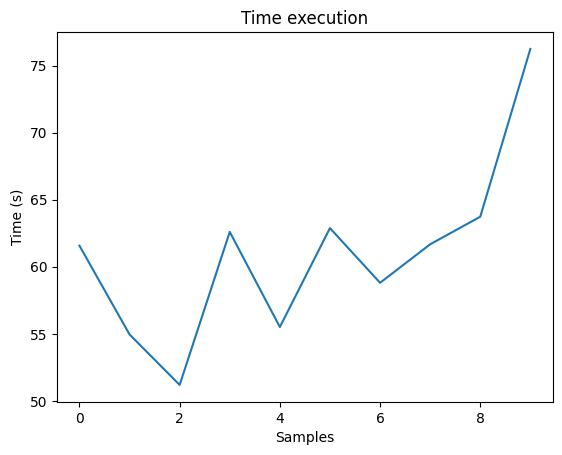

In [4]:
plt.plot(data)
plt.title('Time execution')
plt.xlabel('Samples')
plt.ylabel('Time (s)')
plt.show()

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import os

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

stable_diffusion_2_1_time = []

path = 'custom'

os.mkdir(path)

prompt = "A very fluffy cat singing under the rain"

image = pipe(prompt).images[0]

stable_diffusion_2_1_time.append(end - start)

image.save(f"{path}/stable_diffusion_2_1_{prompt.replace(' ', '_')}.png")